Elapsed time (imports -> pre-plot): 0.051 s


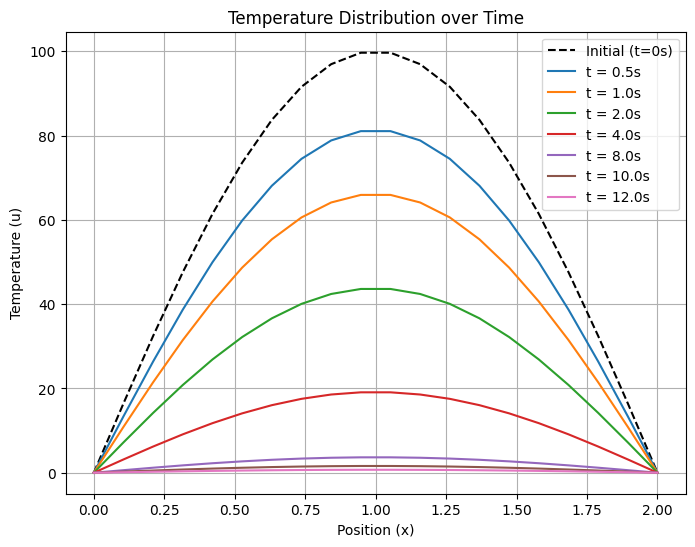

In [2]:
#Crank Nicholson Heat Equation Solver
#This solver cranks out the nicholson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.linalg import solve_banded
import time

tStart = time.perf_counter()


def calculateAlpha(k,c,rho):
    return (k/(c*rho))

def generateMeshGrid(x0,xN,dx):
    x = np.arange(x0,xN,dx)
    numPoints = len(x)
    x = np.linspace(x0,xN,numPoints)
    return x

def applyInitialConditions(x):
    u = 100 * np.sin((np.pi*x)/2)
    return u

def applyBoundaryConditions(u):
    u[0] = 0
    u[-1] = 0
    return u

def solverCrankNicholson(u,alpha, r, dt, tEnd):
    N = len(u) - 2

    main_diag = (1 + 2 * r) * np.ones(N)
    off_diag = -r * np.ones(N - 1)

    tridiagonalMatrix = np.vstack([np.append(0, off_diag), main_diag, np.append(off_diag, 0)])

    #Loop in time every dt and ball
    num_steps = int(tEnd / dt)
    for _ in range(num_steps):
        b = r * u[0:-2] + (1 - 2 * r) * u[1:-1] + r * u[2:]
        uNext = solve_banded((1, 1), tridiagonalMatrix, b)
        u[1:-1] = uNext

    return u


#Main Code using function for solving
k = 0.13
c = 0.11
rho = 7.8

x0 = 0
xN = 2
dx = 0.1

dt = 0.01
tEnd = np.array([0.5,1,2,4,8,10,12])
#tEnd = np.linspace(0,12,49)

alpha = calculateAlpha(k,c,rho)
r = (alpha * dt)/(2 * (dx**2))
x = generateMeshGrid(x0,xN,dx)

u = applyInitialConditions(x)
u = applyBoundaryConditions(u)
uInitial = u.copy()
uSolved = np.zeros((len(tEnd), len(u)))



for i, t in enumerate(tEnd):
    #print(f"Solving for t = {t}s...")
    uSolved[i] = solverCrankNicholson(uInitial.copy(), alpha, r, dt, t)
    #print(uSolved[i])

uSolved = np.array(uSolved)

tElapsed = time.perf_counter() - tStart
print(f"Elapsed time (imports -> pre-plot): {tElapsed:.3f} s")


plt.figure(figsize=(8, 6))
plt.title("Temperature Distribution over Time")
plt.plot(x, uInitial, label="Initial (t=0s)", linestyle="--", color='black')
for i, t in enumerate(tEnd):
    plt.plot(x, uSolved[i], label=f"t = {t}s")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (u)")
plt.grid(True)
plt.legend()
plt.show()

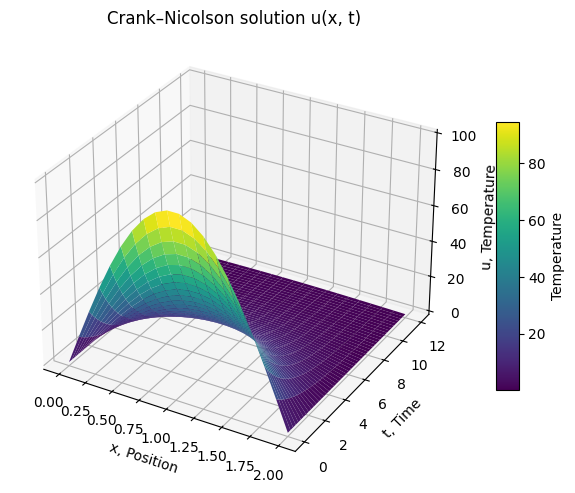

In [3]:
def solveCrankNicholson_timehistory(u0, alpha, r, dt, tMax):

    u = u0.copy()
    nx = len(u)
    N = nx - 2

    main_diag = (1 + 2 * r) * np.ones(N)
    off_diag = -r * np.ones(N - 1)
    A_banded = np.vstack([np.append(0, off_diag), main_diag, np.append(off_diag, 0)])

    num_steps = int(np.round(tMax / dt))
    times = np.linspace(0, num_steps * dt, num_steps + 1)

    U = np.empty((num_steps + 1, nx))
    U[0] = u

    for n in range(num_steps):
        b = r * u[0:-2] + (1 - 2 * r) * u[1:-1] + r * u[2:]
        uNext = solve_banded((1, 1), A_banded, b)
        u[1:-1] = uNext
        U[n + 1] = u

    return times, U


tMax = max(tEnd)  # cover entire time range
times, U = solveCrankNicholson_timehistory(uInitial, alpha, r, dt, tMax)

T, X = np.meshgrid(times, x, indexing='ij')  # shapes: (nt+1, nx)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap='viridis', linewidth=0, antialiased=True)

ax.set_title("Crank–Nicolson solution u(x, t)")
ax.set_xlabel("x, Position")
ax.set_ylabel("t, Time")
ax.set_zlabel("u, Temperature")

fig.colorbar(surf, shrink=0.6, aspect=12, label="Temperature")
plt.tight_layout()
plt.show()

